## 04 - part 2 - Discrete Fourier Transform

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import time

The Discrete Fourier Transform (DFT) computes, for every frequency $u$, starting with $u=0$, the coefficients related to this frequency according to a sine and a cosine function (implemented via a complex exponential)

For an input array with $n$ elements, the DFT 1d can be written as 

$$F(u) = \sum_{x=0}^{n-1} f(x) e^{-j 2\pi (u x)/n }$$,
where $x$ are the array indices, and $j$ is the imaginary unit.

It is often employed using a normalization based on the square root of the number of observations, so we include this on our implementation:

$$F(u) = \frac{1}{\sqrt{n}}\sum_{x=0}^{n-1} f(x) e^{-j 2\pi (u x)/n }$$

$F(u)$ must be evaluated for $u=0,\ldots,n-1$, as in the function below

In [2]:
# defining a DFT 1D function
def DFT1D(f):
    
    F = np.zeros(f.shape, dtype=np.complex64)
    n = f.shape[0]

    # measuring running time 
    start = time.time()
    
    # for each frequency
    for u in np.arange(n):
        # for each element
        for x in range(n):
            F[u] += f[x]*np.exp( (-1j * 2 * np.pi * u*x) / n )
            
    end = time.time()
    elapsed1 = end - start

    print("Running time: " + str(elapsed1) + "sec.")
    
    return F/np.sqrt(n)

Let us define a signal based on a sum of sines and cosines. This is a discrete signal with 200 observations.

(200,)

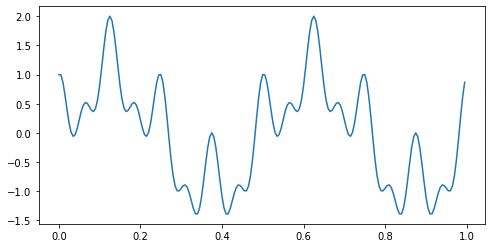

In [3]:
t = np.arange(0, 1, 0.005)
f = 1*np.sin(t*(2*np.pi) * 2) + 0.6*np.cos(t*(2*np.pi) * 8) + 0.4*np.cos(t*(2*np.pi) * 16)

plt.figure(figsize=(8,4)) 
plt.plot(t,f)
t.shape


Running time: 0.3603017330169678sec.


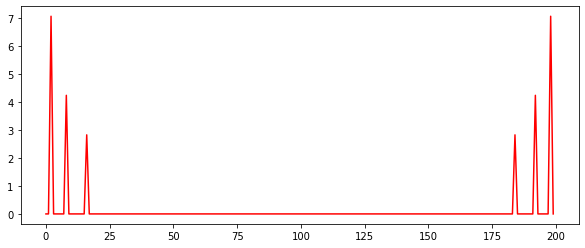

In [4]:
# computing the DFT
F = DFT1D(f)

# showing the evaluated frequencies
fq = np.arange(200)
plt.figure(figsize=(10,4)) 
# plot the magnitude of the DFT
plt.plot(fq, abs(F), 'r')

Due to the symmetric property of the sine and cosine functions (which are similar in shape, but shifted), the Fourier Transform is also symmetric with respect to its central coefficient. One interpretation is that both the positive and negative frequency sinusoids are 90 degrees out of phase, but the magnitude of their response will be the same. In other words, they both respond to real signals in the same way.

Let us plot just a part of the frequencies, since those appear to be concentrated before the 32 Hz.

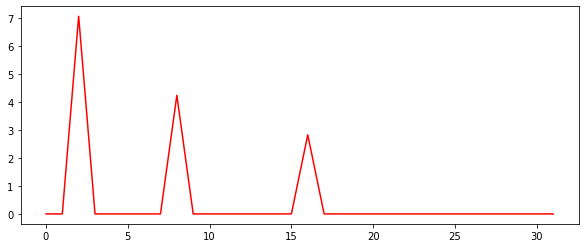

In [5]:
limit = 32 # frequency limit to show the DFT of the signal
fq = np.arange(limit)
plt.figure(figsize=(10,4)) 
plt.plot(fq, abs(F[0:limit]), 'r')

The DFT has quadratic complexity, i.e. $O(n^2)$, for an input signal with $n$ observations. Let make our function more optimized by using numpy array multiplication and sum. Note how faster is this strategy.

In [6]:
# re-implementing the function to be more optimized
def DFT1D(f):
    # create empty array of complex coefficients
    F = np.zeros(f.shape, dtype=np.complex64)
    n = f.shape[0]

    start = time.time()
    
    # creating indices for x, allowing to compute the multiplication using numpy (f*exp)
    x = np.arange(n)
    # for each frequency 'u', perform vectorial multiplication and sum
    for u in np.arange(n):
        F[u] = np.sum(f*np.exp( (-1j * 2 * np.pi * u*x) / n ))
        
    end = time.time()
    elapsed = end - start
    
    print("Vector size: " + str(n))
    print("Running time: " + str(elapsed) + " sec.")
    
    return F/np.sqrt(n)


Vector size: 200
Running time: 0.006005764007568359 sec.


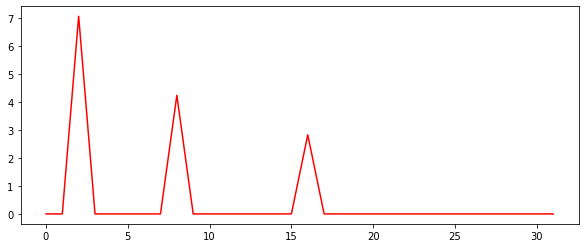

In [7]:
F = DFT1D(f)
limit = 32
fq = np.arange(limit)
plt.figure(figsize=(10,4)) 
plt.plot(fq, abs(F[0:limit]), 'r')


### Applying frequency analysis in images

Let us consider each image is a one-dimensional array, formed by a concatenation of its rows. 

However, the DFT is $O(n^2)$, therefore it may be unfeasible for large images. For example a 1 Megapixel image would require a number of operations proportional to:
$$n^2 = 1.000.000^2 = 10^{12}$$

If each operation requires 0.1 milliseconds, then the DFT would take, in hours, approximately:
$$(10^{12}/1000))/60)/60 \approx 277.8$$,
that is, around 277 hours to process.

Therefore we are going to use subimages in this first analysis.

*Note: there is a faster implementation of the DFT, known as the Fast Fourier Transform, as we are going to see later. But, for now, let us just understand the DFT concepts.*

(-0.5, 511.5, 511.5, -0.5)

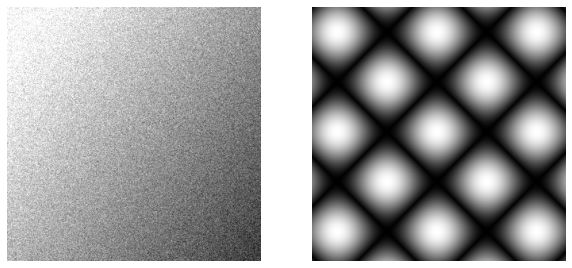

In [8]:
#loading images
img1 = imageio.imread("images/gradient_noise.png")
img2 = imageio.imread("images/sin1.png")
plt.figure(figsize=(10,8)) 
plt.subplot(121)
plt.imshow(img1, cmap="gray")
plt.axis('off')
plt.subplot(122)
plt.imshow(img2, cmap="gray")
plt.axis('off')

In [9]:
# extracting subimages with 1024 elements
start = 10000
total = 1024

vet1 = img1.reshape([img1.shape[0] * img1.shape[1]])
vet1 = vet1[start:start+total]

vet2 = img2.reshape([img2.shape[0] * img2.shape[1]])
vet2 = vet2[start:start+total]

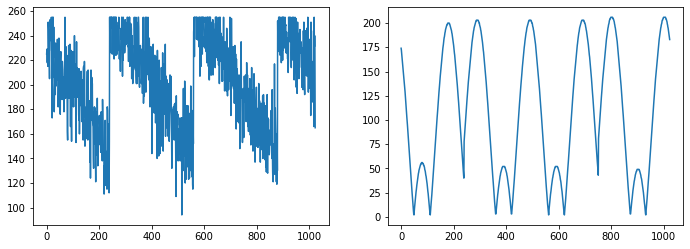

In [10]:
plt.figure(figsize=(18,4)) 
plt.subplot(131)
plt.plot(vet1)
plt.subplot(132)
plt.plot(vet2)

In [11]:
F1 = DFT1D(vet1)
F2 = DFT1D(vet2)

Vector size: 1024
Running time: 0.07436132431030273 sec.
Vector size: 1024
Running time: 0.06732797622680664 sec.


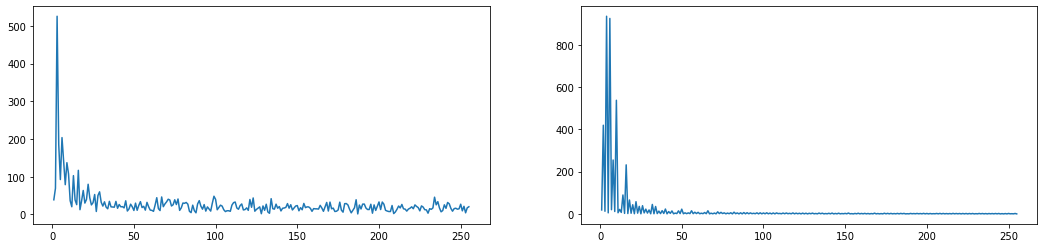

In [12]:
limit = int(vet1.shape[0]/4) # showing the first frequencies
fq = np.arange(1,limit)

plt.figure(figsize=(18,4)) 
plt.subplot(121)
plt.plot(fq, np.abs(F1[1:limit]))
plt.subplot(122)
plt.plot(fq, np.abs(F2[1:limit]))

##### When plotting the frequency coefficients magnitude, we note that interpreting real signals and images may be more difficult. 

However, there are important characteristics to observe in such data. For example, note that image 2 does show significant magnitude values concentrated before 50Hz, while image 1 has a more spreaded frequency information, even close to 250Hz. Let us show the logarithm of the frequencies, to enhance lower values.

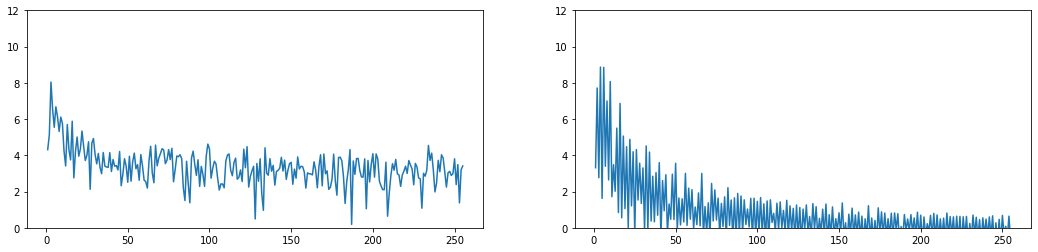

In [13]:
plt.figure(figsize=(18,4)) 
plt.subplot(121)
axes = plt.gca()
axes.set_ylim([0,12])
plt.plot(fq, np.log2(1+ np.abs(F1[1:limit]))-1)
plt.subplot(122)
axes = plt.gca()
axes.set_ylim([0,12])
plt.plot(fq, np.log2(1+ np.abs(F2[1:limit]))-1)

Note how the profile of the image 1 (which is a noisy image) shows higher coefficients along all frequencies, while image 2 is better represented at the first frequencies, with a fast decay ater 50Hz.

This means image 1 has intensity values with faster oscilation, probably noise or texture content present in the image.

Now let us extend the 1D to the 2D version of the DFT, which is given by: 

$$F(u,v) = \frac{1}{\sqrt{nm}}\sum_{x=0}^{n-1} \sum_{y=0}^{m-1} f(x,y) e^{-j 2\pi [(u x)/n + (v y)/m]}$$,

Note that now we evaluate frequencies in two dimensions ($u$ and $v$)


In [14]:
# implementing a 2D version of the DFT
def DFT2D_SLOW(f):
    # create empty array of complex coefficients
    F = np.zeros(f.shape, dtype=np.complex64)
    n,m = f.shape[0:2]

    start = time.time()
    
    # creating indices for x, allowing to compute the multiplication using numpy (f*exp)
    x = np.arange(n)
    y = np.arange(m)
    # for each frequency 'u,v'
    for u in np.arange(n):
        for v in np.arange(m):
            # for each image pixel
            for x in np.arange(n):
                for y in np.arange(m):
                    F[u,v] += f[x,y]*np.exp( (-1j*2*np.pi) * (((u*x)/n)+((v*y)/m)) ) 
        
    end = time.time()
    elapsed = end - start
    
    print("Vector size: " + str(n))
    print("Running time: " + str(elapsed) + " sec.")
    
    return F/np.sqrt(n*m)


In [26]:
# implementing a 2D version of the DFT
def DFT2D(f):
    # create empty array of complex coefficients
    F = np.zeros(f.shape, dtype=np.complex64)
    n,m = f.shape[0:2]
    start = time.time()
    
    # creating indices for x, to compute multiplication using numpy (f*exp)
    x = np.arange(n)
    # for each frequency 'u,v'
    for u in np.arange(n):
        for v in np.arange(m):
            for y in np.arange(m):
                F[u,v] += np.sum(f[:,y] * np.exp( (-1j*2*np.pi) * (((u*x)/n)+((v*y)/m)) ))
                
        
    end = time.time()
    elapsed = end - start
    
    print("Image size: " + str(n*m))
    print("Running time: %.5f sec." %  elapsed)
    
    return F/np.sqrt(n*m)


In [27]:
# extracting subimages with 64x64=4096 pixels
sizes = 64
img1_sub = img1[:sizes, :sizes]
img2_sub = img2[:sizes, :sizes]

F1s = DFT2D(img1_sub)
F2s = DFT2D(img2_sub)

Image size: 4096
Running time: 8.07093 sec.
Image size: 4096
Running time: 7.55403 sec.


Visualizing the **Power Spectrum** $|F(u,v)|^2$

(-0.5, 63.5, 63.5, -0.5)

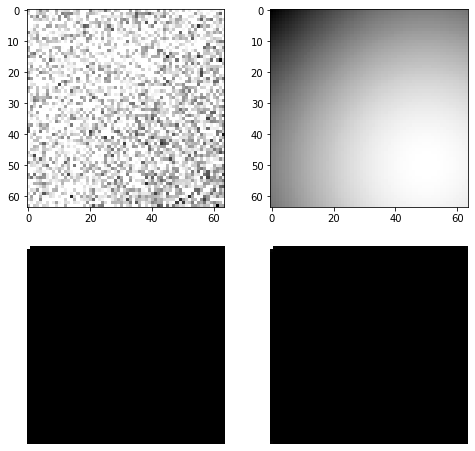

In [22]:
plt.figure(figsize=(8,8)) 
plt.subplot(221)
plt.imshow(img1_sub, cmap="gray")
plt.subplot(222)
plt.imshow(img2_sub, cmap="gray")
plt.subplot(223)
# the power spectrum
plt.imshow(np.abs(F1s)**2, cmap="gray")
plt.axis('off')
plt.subplot(224)
plt.imshow(np.abs(F2s)**2, cmap="gray")
plt.axis('off')

Visualizing the **Log-spectrum** $\log(1+|F(u,v)|)$

using the FFT-shift displacement

(-0.5, 63.5, 63.5, -0.5)

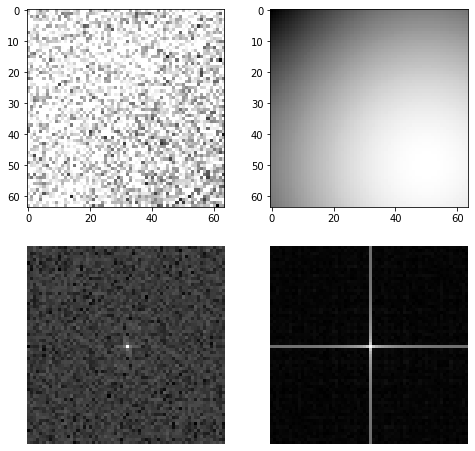

In [28]:
plt.figure(figsize=(8,8)) 
plt.subplot(221)
plt.imshow(img1_sub, cmap="gray")
plt.subplot(222)
plt.imshow(img2_sub, cmap="gray")
plt.subplot(223)
# the log of the magnitudes are shown to better visualize smaller coefficients
plt.imshow(np.log(1 + np.fft.fftshift(np.abs(F1s))), cmap="gray")
plt.axis('off')
plt.subplot(224)
plt.imshow(np.log(1 + np.fft.fftshift(np.abs(F2s))), cmap="gray")
plt.axis('off')

The visualization of the Fourier coefficients show a peak at the (0,0) coordinate. This is because the first coefficient is proportional do the sum of all values of the input array, as follows

$$F(0,0) = \frac{1}{\sqrt{nm}}\sum_{x=0}^{n-1} \sum_{y=0}^{m-1} f(x,y) e^{-j 2\pi [(0 x)/n + (0 y)/m]}$$,

$$F(0,0) = \frac{1}{\sqrt{nm}}\sum_{x=0}^{n-1} \sum_{y=0}^{m-1} f(x,y) e^{0}$$,

$$F(0,0) = \frac{1}{\sqrt{nm}}\sum_{x=0}^{n-1} \sum_{y=0}^{m-1} f(x,y)$$,


That is the reason often the Fourier coefficients are plotted using logarithmic function.

Comparing the two visualizations above, the noisy image has coefficients with magnitudes in various frequencies in two dimensions, while the second image has specific frequencies, relative to the two directions, indicating a diagonal ramp.

It is more common to visualize the 2D DFT values in a different way, by shifting the quadrants, to improve interpretation of the transform. We are going to show it next.

**Exercise**: implement the Inverse Transforms for the 1D and 2D cases. Perform the DFT and its inverse, and compare the original and the inverted images, by computing the RMSE (Root mean square error) between the images.

The Inverse Discrete Fourier Transforms are given by the following equations. Note the inverted signal for the imaginary unit:

$$f(x) = \frac{1}{\sqrt{n}}\sum_{u=0}^{n-1} F(u) e^{j 2\pi [(u x)/n]}$$,


$$f(x,y) = \frac{1}{\sqrt{nm}}\sum_{u=0}^{n-1} \sum_{v=0}^{m-1} F(u,v) e^{j 2\pi [(u x)/n + (v y)/m]}$$
